# 10.3 ボルツマンマシン

## 10.3.1 エネルギーベースモデル (Energy-based model)
入力 $\mathbf{x}\in \mathbb{R}^d$, エネルギー関数 $E_\theta: \mathbb{R}^d\to \mathbb{R}$を考える．

$$
\begin{align}
p_\theta(\mathbf{x})&=\frac{\exp(-E_\theta(\mathbf{x})}{Z_\theta}\\
Z_\theta &= \int \exp(-E_\theta(\mathbf{x})) d\mathbf{x}
\end{align}
$$

$Z_\theta$は分配関数．

## 10.3.2 ボルツマンマシン (Boltzmann machine)

## 10.3.3 制限ボルツマンマシン (Restricted Boltzmann machine) 
(cf.) <http://deeplearning.net/tutorial/rbm.html>

データの読み込み

In [1]:
using MLDatasets
using PyPlot
using Random
using ProgressMeter

In [2]:
train_x, _ = MNIST.traindata()
size(train_x)

(28, 28, 60000)

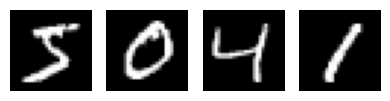

In [3]:
figure(figsize=(4, 1.5))
for i in 1:4
    subplot(1,4,i)
    imshow(train_x[:, :, i]', cmap="gray")
    axis("off")
end
tight_layout()

In [4]:
num_data = 100
input_size = 28*28
data = train_x[:, :, 1:num_data]
data = reshape(data, (input_size, num_data))'

println(size(data))

(100, 784)


In [5]:
width = 28   # MNIST dataの幅
num_v = input_size # visible variables
num_h = 100 # hidden variables
num_units = num_v + num_h # all units
η = 0.01 # learning rate
num_epoch = 50 # epoch of learning 
num_draws = 20  # The number of samples to draw

20

離散の観測変数(visible variable) $\mathbf{v}$, 潜在変数(hidden variable) $\mathbf{h}$とする．各ユニットの値は$\{0, 1\}$の2値 (binary)である．

エネルギー関数を

$$
E_\theta(\mathbf{v}, \mathbf{h})=-\mathbf{b}^T \mathbf{v} - \mathbf{c}^T \mathbf{h} + \mathbf{v}^T \mathbf{W} \mathbf{h}
$$

とする．ただし，$\theta=\{\mathbf{W}, \mathbf{b}, \mathbf{c}\}$

In [6]:
# sigmoid function 
sigmoid(x) = 1 / (1+exp(-x))

# Initial parameters
W = 0.2 * randn(num_h, num_v)
hbias = 0.2* randn(num_h, 1)
vbias = 0.2 * randn(num_v, 1)

println(size(W), size(hbias), size(vbias))

(100, 784)(100, 1)(784, 1)


シグモイド関数を

$$
\sigma(x) = \frac{1}{1+\exp(-x)}
$$

とする．

### 訓練データで学習

$$
\begin{align}
p_\theta(\mathbf{h}|\mathbf{v})&=\prod_i p_\theta(h_i=1|\mathbf{v})=\prod_i \sigma(c_i + W_i \mathbf{v})\\
p_\theta(\mathbf{v}|\mathbf{h})&=\prod_j p_\theta(v_j=1|\mathbf{h})=\prod_j \sigma(b_j + W_j^T \mathbf{h})
\end{align}
$$

In [7]:
@showprogress "Computing..." for epoch in 1:num_epoch
    for i in 1:num_data
        input = data[i, :]
        h_given_v = sigmoid.(W * input + hbias)
        v = 0.5 * ones(num_v, 1) # init state
        h = 0.5 * ones(num_h, 1) # init state
        sum_v = zeros(num_v, 1)
        sum_h = zeros(num_h, 1)
        outerprod = zeros(num_h, num_v)

        for _ in 1:num_draws
            h = 1.0f0 * (sigmoid.(W * v + hbias) .≥ rand(num_h, 1)) # hidden 
            v = 1.0f0 * (sigmoid.(W' * h + vbias) .≥ rand(num_v, 1)) # visible
            #h = floor.(sigmoid.(W * v + hbias) + rand(num_h, 1)) # hidden 
            #v = floor.(sigmoid.(W' * h + vbias) + rand(num_v, 1)) # visible
            sum_h += h
            sum_v += v
            outerprod += h * v'
        end
            
        sum_h /= num_draws
        sum_v /= num_draws
        outerprod /= num_draws
        
        # update parameters
        W += η * (h_given_v * input' - outerprod)
        hbias += η * (h_given_v - sum_h)
        vbias += η * (input - sum_v)
    end
end

Computing...  2%|█                                      |  ETA: 0:03:46

Computing...  4%|██                                     |  ETA: 0:02:36

Computing...  6%|███                                    |  ETA: 0:02:01

Computing...  8%|████                                   |  ETA: 0:01:41

Computing... 10%|████                                   |  ETA: 0:01:27

Computing... 12%|█████                                  |  ETA: 0:01:18

Computing... 14%|██████                                 |  ETA: 0:01:10

Computing... 16%|███████                                |  ETA: 0:01:04

Computing... 18%|████████                               |  ETA: 0:00:59

Computing... 20%|████████                               |  ETA: 0:00:54

Computing... 22%|█████████                              |  ETA: 0:00:51

Computing... 24%|██████████                             |  ETA: 0:00:48

Computing... 26%|███████████                            |  ETA: 0:00:45

Computing... 28%|███████████                            |  ETA: 0:00:42

Computing... 30%|████████████                           |  ETA: 0:00:40

Computing... 32%|█████████████                          |  ETA: 0:00:38

Computing... 34%|██████████████                         |  ETA: 0:00:36

Computing... 36%|███████████████                        |  ETA: 0:00:35

Computing... 38%|███████████████                        |  ETA: 0:00:33

Computing... 40%|████████████████                       |  ETA: 0:00:31

Computing... 42%|█████████████████                      |  ETA: 0:00:30

Computing... 44%|██████████████████                     |  ETA: 0:00:28

Computing... 46%|██████████████████                     |  ETA: 0:00:27

Computing... 48%|███████████████████                    |  ETA: 0:00:26

Computing... 50%|████████████████████                   |  ETA: 0:00:25

Computing... 52%|█████████████████████                  |  ETA: 0:00:23

Computing... 54%|██████████████████████                 |  ETA: 0:00:22

Computing... 56%|██████████████████████                 |  ETA: 0:00:21

Computing... 58%|███████████████████████                |  ETA: 0:00:20

Computing... 60%|████████████████████████               |  ETA: 0:00:19

Computing... 62%|█████████████████████████              |  ETA: 0:00:18

Computing... 64%|█████████████████████████              |  ETA: 0:00:17

Computing... 66%|██████████████████████████             |  ETA: 0:00:16

Computing... 68%|███████████████████████████            |  ETA: 0:00:15

Computing... 70%|████████████████████████████           |  ETA: 0:00:14

Computing... 72%|█████████████████████████████          |  ETA: 0:00:13

Computing... 74%|█████████████████████████████          |  ETA: 0:00:12

Computing... 76%|██████████████████████████████         |  ETA: 0:00:11

Computing... 78%|███████████████████████████████        |  ETA: 0:00:10

Computing... 80%|████████████████████████████████       |  ETA: 0:00:09

Computing... 82%|████████████████████████████████       |  ETA: 0:00:08

Computing... 84%|█████████████████████████████████      |  ETA: 0:00:07

Computing... 86%|██████████████████████████████████     |  ETA: 0:00:06

Computing... 88%|███████████████████████████████████    |  ETA: 0:00:05

Computing... 90%|████████████████████████████████████   |  ETA: 0:00:04

Computing... 92%|████████████████████████████████████   |  ETA: 0:00:03

Computing... 94%|█████████████████████████████████████  |  ETA: 0:00:03

Computing... 96%|██████████████████████████████████████ |  ETA: 0:00:02

Computing... 98%|███████████████████████████████████████|  ETA: 0:00:01

Computing...100%|███████████████████████████████████████| Time: 0:00:42


二項分布 (bernoulli distribution)のサンプリングには2通りある．`1.0f0`を乗じているのはBool変数からFloatへの変換のため．詳細はtips.

### テストデータで確認

In [8]:
num_draws_test = 50 # draws for in test
num_see = 392  # Visible units in test
noise_scale = 0.1 # テスト時のノイズレベル
num_testdata = 4

4

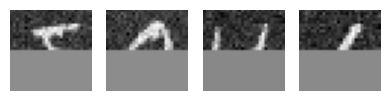

In [9]:
testdata = data[1:num_testdata, :] + noise_scale * randn(num_testdata, input_size)
testdata[:, num_see+1:num_v] .= 0.5

figure(figsize=(4, 1.5))
for i in 1:4
    subplot(1,4,i)
    imshow(reshape(testdata[i, :], (width, width))', cmap="gray")
    axis("off")
end
tight_layout()

In [10]:
energy(v, h) = -v' * vbias - h' * hbias - h' * W * v
# free_energy(v) = -v' * vbias .- sum(log.(1 .+ exp.(W * v + hbias)))

energy (generic function with 1 method)

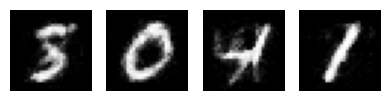

In [11]:
# Results of Test data
energy_arr = zeros(num_testdata, num_draws_test)
figure(figsize=(4, 1.5))

for i in 1:num_testdata
    v = 0.5 * ones(num_v, 1) # init state
    h = 0.5 * ones(num_h, 1) # init state
    sum_v = zeros(num_v, 1)
    for j in 1:num_draws_test
        v[1:num_see, 1] = testdata[i, 1:num_see]'
        h = 1.0f0 * (sigmoid.(W * v + hbias) .≥ rand(num_h, 1))
        v = 1.0f0 * (sigmoid.(W' * h + vbias) .≥ rand(num_v, 1))
        sum_v += v
        energy_arr[i, j] = energy(v, h)[1]
    end
    sum_v /= num_draws_test
    
    # show
    subplot(1,4,i)
    imshow(reshape(sum_v, (width, width))', cmap="gray")
    axis("off")
end

tight_layout()

エネルギーの変化を見る

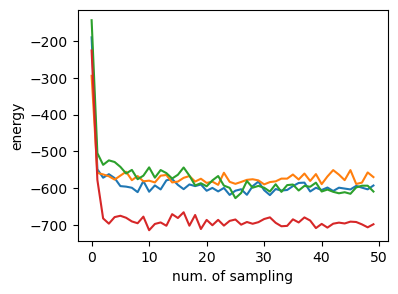

In [12]:
figure(figsize=(4,3))
ylabel("energy")
xlabel("num. of sampling")
for i in 1:4
    plot(energy_arr[i, :])
end

### 受容野の可視化

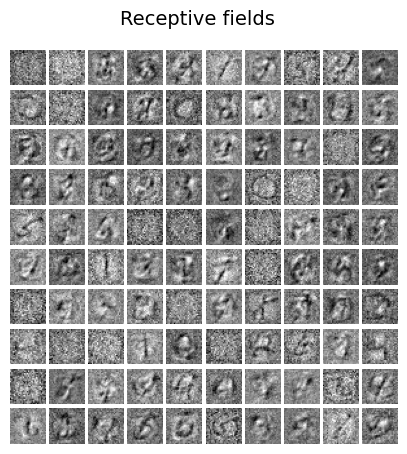

In [13]:
# Plot Receptive fields
figure(figsize=(5, 5))
subplots_adjust(hspace=0.1, wspace=0.1)
for i in 1:num_h
    subplot(10, 10, i)
    imshow(reshape(W[i, :], (width, width))', cmap="gray")
    axis("off")
end
suptitle("Receptive fields", fontsize=14)
subplots_adjust(top=0.9)